# SVR model for height

## <span style="color:red"> Preprocessing </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading data
data = pd.read_csv("HeightWeight.csv")
data

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [3]:
data.drop("Index", axis=1, inplace=True)
data

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [4]:
x = data["Height(Inches)"].values
y = data["Weight(Pounds)"].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
print(x.ndim)

2


### Cleaning data

In [5]:
data.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [7]:
# cheking  for duplicates
data.duplicated().sum()

0

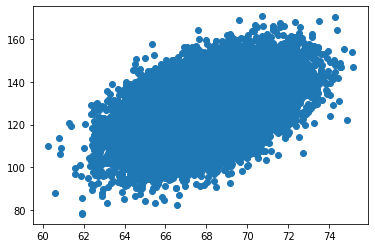

In [8]:
# Visualizing data to detect outliers
plt.scatter(data["Height(Inches)"], data["Weight(Pounds)"])
plt.show()

In [9]:
# removinf outliers by IQR methode

Q1,Q3 = np.percentile(data["Height(Inches)"] , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
outlier1 = data[(data["Height(Inches)"] > ul) | (data["Height(Inches)"] < ll)]
print(len(outlier1))
data.drop(outlier1.index, inplace=True)

167


In [10]:
# removinf outliers by IQR methode

Q1,Q3 = np.percentile(data["Weight(Pounds)"] , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
outlier2 = data[(data["Weight(Pounds)"] > ul) | (data["Weight(Pounds)"] < ll)]
print(len(outlier2))
data.drop(outlier2.index, inplace=True)

183


In [11]:
data

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


### Feature Scaling

In [12]:
# Feature scaling is not necessary, but for exercise i will do it.
from sklearn.preprocessing import StandardScaler

In [13]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

### Splitting Data

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## <span style="color:red"> Processing </span>

### Creating Model

In [15]:
from sklearn.svm import SVR

In [16]:
regr = SVR()
regr.fit(x_train, y_train)

/usr/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [17]:
# predicting a random height
sc_y.inverse_transform(regr.predict(sc_x.transform([[65.78331]])).reshape(-1,1))

array([[120.6187821]])

### Evaluating the model

In [18]:
y_pred = sc_y.inverse_transform(regr.predict(x_test).reshape(-1, 1))

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(sc_y.inverse_transform(y_test), y_pred)

0.26064063040365626

# Multiple Regression 

## <span style="color:red"> Processing </span>

### Creating Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
multiple_regr = LinearRegression()
multiple_regr.fit(x_train, y_train)

LinearRegression()

In [23]:
# predicting a first height
sc_y.inverse_transform(multiple_regr.predict(sc_x.transform([[65.78331]])).reshape(-1, 1))

array([[120.32759267]])

### Evaluating Model

In [24]:
y_multiple_pred = multiple_regr.predict(x_test)

In [25]:
r2_score(y_test, y_multiple_pred)

0.2610230957540427